# 📈 折线图 (Line Chart) - 趋势分析

## 什么是折线图？

折线图通过连接数据点展示**随时间变化的趋势**，是时间序列分析的基础工具。

## 适用场景

| 场景 | 示例 |
|------|------|
| 时间趋势分析 | 各届奥运会平均奖牌数变化 |
| 多序列比较 | 不同国家的奖牌数变化对比 |
| 周期性识别 | 发现4年/8年的周期模式 |
| 预测可视化 | 展示历史数据与预测值 |

## 关键指标解读

- **上升趋势**：整体向右上方倾斜 → 增长态势
- **下降趋势**：整体向右下方倾斜 → 衰退态势
- **周期波动**：有规律的起伏 → 可能受周期性因素影响
- **突变点**：曲线急剧变化 → 可能发生重大事件
- **斜率变化**：增速加快/减慢


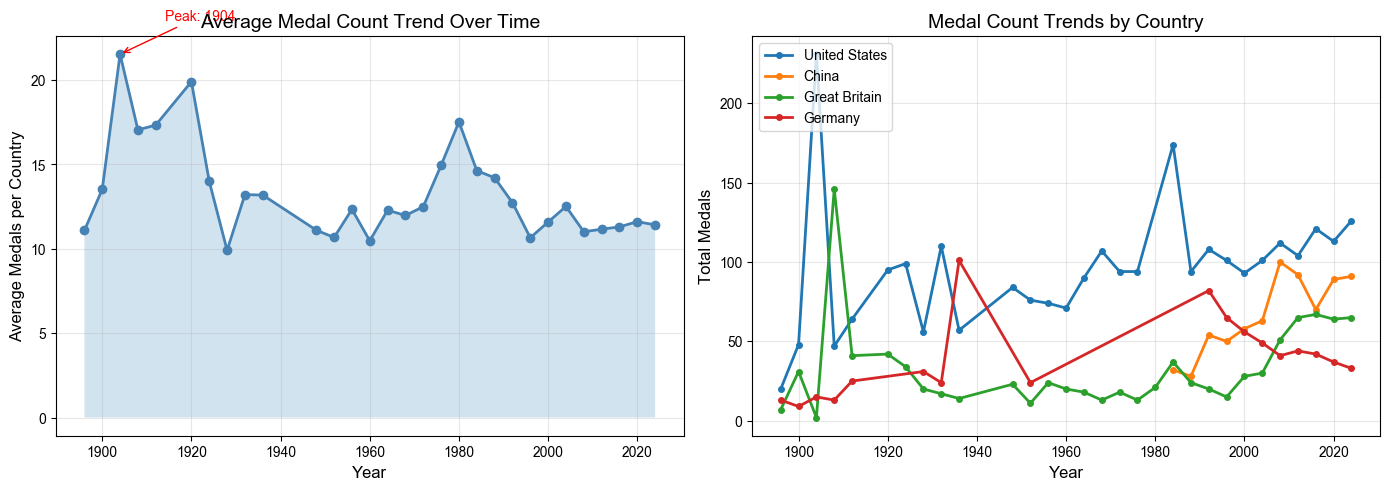

📊 趋势分析:
  最高年份: 1904 (平均 21.5 枚)
  最近趋势: 上升


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 加载数据
df = pd.read_csv('../preprocessing/2025C示例/processed_medal_data.csv')

# 计算每年的统计数据
yearly_stats = df.groupby('Year')['Total'].agg(['mean', 'sum', 'count'])

# 创建图表
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 单序列趋势图
axes[0].plot(yearly_stats.index, yearly_stats['mean'], 
             marker='o', color='steelblue', linewidth=2, markersize=6)
axes[0].fill_between(yearly_stats.index, yearly_stats['mean'], alpha=0.2)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Average Medals per Country', fontsize=12)
axes[0].set_title('Average Medal Count Trend Over Time', fontsize=14)
axes[0].grid(True, alpha=0.3)

# 标注关键年份
max_year = yearly_stats['mean'].idxmax()
axes[0].annotate(f'Peak: {max_year}', 
                 xy=(max_year, yearly_stats.loc[max_year, 'mean']),
                 xytext=(max_year+10, yearly_stats.loc[max_year, 'mean']+2),
                 arrowprops=dict(arrowstyle='->', color='red'),
                 fontsize=10, color='red')

# 2. 多序列对比（选取几个代表性国家）
countries = ['United States', 'China', 'Great Britain', 'Germany']
for country in countries:
    country_data = df[df['NOC'] == country].sort_values('Year')
    axes[1].plot(country_data['Year'], country_data['Total'], 
                 marker='o', label=country, linewidth=2, markersize=4)

axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Total Medals', fontsize=12)
axes[1].set_title('Medal Count Trends by Country', fontsize=14)
axes[1].legend(loc='upper left')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 趋势分析:")
print(f"  最高年份: {max_year} (平均 {yearly_stats.loc[max_year, 'mean']:.1f} 枚)")
print(f"  最近趋势: {'上升' if yearly_stats['mean'].iloc[-1] > yearly_stats['mean'].iloc[-3] else '下降'}")


## 🎯 2025美赛C题解读：历史趋势分析

### 左图分析：全球奖牌趋势

**1. 整体趋势**
- 从1896年到2024年，各国平均奖牌数经历了**先增后稳**的变化
- 早期奥运会参赛国少，平均奖牌数较高
- 1960年代后参赛国增多，平均奖牌被"稀释"
- 近年趋于稳定（约12枚/国）

**2. 重要历史事件的影响**
- **1984年洛杉矶奥运会**：苏联等国抵制，数据可能有波动
- **1992年**：苏联解体，原苏联国家首次分开参赛

### 右图分析：主要国家对比

**1. 美国（United States）** 🇺🇸
- 长期稳定在高位（80-130枚）
- 呈现出极强的**稳定性**，是预测的"锚点"

**2. 中国（China）** 🇨🇳
- 1984年重返奥运后**快速崛起**
- 2008年北京奥运会达到峰值（东道主效应）
- 近年稳定在80-100枚

**3. 英国（Great Britain）** 🇬🇧
- 2012年伦敦奥运会后**显著提升**
- 体现了**"奥运遗产"**效应：东道主效应可能延续到下一届

**4. 德国（Germany）** 🇩🇪
- 两德统一后保持稳定
- 略有下降趋势

### 对建模和预测的启示

1. **时间序列特性**：各国奖牌数有明显的自相关性（滞后特征有效）
2. **东道主脉冲**：2008中国、2012英国、2020日本都出现峰值
3. **2028预测关注点**：
   - 美国作为东道主，预计会有**15-25%的提升**
   - 中国可能保持在85-95枚区间
   
### 答题建议
> "折线图显示各国奖牌数具有较强的时间连续性，支持使用滞后特征建模。同时，2008年中国、2012年英国的峰值验证了东道主效应的存在，为2028年美国的预测提供了参考。"
